In [2]:
import pandas as pd
import json
import seaborn as sns
import pandas as pd
import json
import matplotlib.pyplot as plt

# All timing are in micro seconds (us) 

In [58]:
df = pd.read_csv("./results/oob/mm_oob_cache.csv")
pd.options.display.max_rows = 999
confs = list(df['conf'].values)
unq_m = df['m'].unique()
n_confs = int(df.shape[0] / len(unq_m))
time_cols = ["conversion_in0",	"conversion_in1",	"transfer_in0",	"transfer_in1",	"tilization_in0",	"tilization_in1",	"first_run", "inference_avg"]
for col in time_cols:
    df[col] = df[col].values * 1e6
df

,conf,m,grid_size,in0_storage_type,in1_storage_type,out_storage_type,dtype,math_fidelity,conversion_in0,conversion_in1,transfer_in0,transfer_in1,tilization_in0,tilization_in1,first_run,inference_avg,num_run,TFLOPs (avg),"Utilization (vs (8, 8) user grid)",Utilization (vs 8x11 full grid)
0,f16_m2,256,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,296.354294,200.510025,163.793564,98.228455,345516.920090,187.635422,724435.329437,215.981007,100,0.155358,0.09%,0.12%
1,f16_m2,512,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,178.813934,204.086304,158.071518,149.488449,304596.424103,253.915787,598485.946655,204.262733,100,1.314168,0.73%,1.00%
2,f16_m2,1024,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,268.936157,209.093094,416.517258,348.806381,333642.959595,188.827515,666625.738144,222.692490,100,9.643269,5.35%,7.36%
3,f16_m2,2048,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,245.332718,208.139420,1148.700714,1121.997833,313321.828842,209.331512,726379.156113,899.815559,100,19.092656,10.59%,14.57%
4,f16_m2,3072,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,261.545181,199.556351,2446.651459,2304.315567,282077.312469,184.297562,611664.772034,2232.079506,100,25.976699,14.41%,19.82%
5,f16_m2,4096,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,246.047974,227.928162,4550.695419,4186.153412,343764.781952,231.981277,692867.517471,4580.914974,100,30.002511,16.65%,22.89%
6,f16_m4,256,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,236.272812,134.706497,129.461288,85.353851,221.967697,160.217285,236.272812,208.551884,100,0.160892,0.18%,0.25%
7,f16_m4,512,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,254.154205,144.481659,198.364258,145.435333,244.617462,170.946121,253.200531,225.908756,100,1.188247,1.32%,1.81%
8,f16_m4,1024,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,198.602676,144.243240,359.058380,368.595123,227.451324,168.085098,255.346298,227.537155,100,9.437947,10.47%,14.40%
9,f16_m4,2048,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,248.432159,139.474869,1172.542572,1039.028168,231.027603,169.277191,240.802765,953.264236,100,18.022148,20.00%,27.50%


In [4]:
conf_infos = dict()
infs = ['in0_storage_type',
       'in1_storage_type', 'out_storage_type', 'dtype', 'math_fidelity',]
for conf in confs:
    conf_infos[conf] = dict()
    val0 = df.loc[df['conf'] == conf]
    for inf in infs:
        conf_infos[conf][inf] = val0[inf].values[0]
conf_infos

{'f16_m4': {'in0_storage_type': 'DRAM',
  'in1_storage_type': 'DRAM',
  'out_storage_type': 'DRAM',
  'dtype': 'DataType.BFLOAT16',
  'math_fidelity': 'MathFidelity.HiFi4'},
 'f16_m2': {'in0_storage_type': 'DRAM',
  'in1_storage_type': 'DRAM',
  'out_storage_type': 'DRAM',
  'dtype': 'DataType.BFLOAT16',
  'math_fidelity': 'MathFidelity.HiFi2'}}

In [5]:
def get_column_df_info(df_inf, d_name, c_name = 'conf', mean=False):
    data = dict()
    c_list = df_inf[c_name].unique()

    for c in c_list:
        data[c] = list()

        for m in unq_m:
            val0 = df_inf.loc[(df_inf['m'] == m) & (df_inf[c_name] == c)][d_name].values
            if mean:
                val0 = val0.mean()
            else:
                val0 = val0[0]
            data[c].append(val0)

    df_c = pd.DataFrame.from_dict(data)
    df_c.set_index(unq_m, inplace=True)
    return df_c

## Data movement time

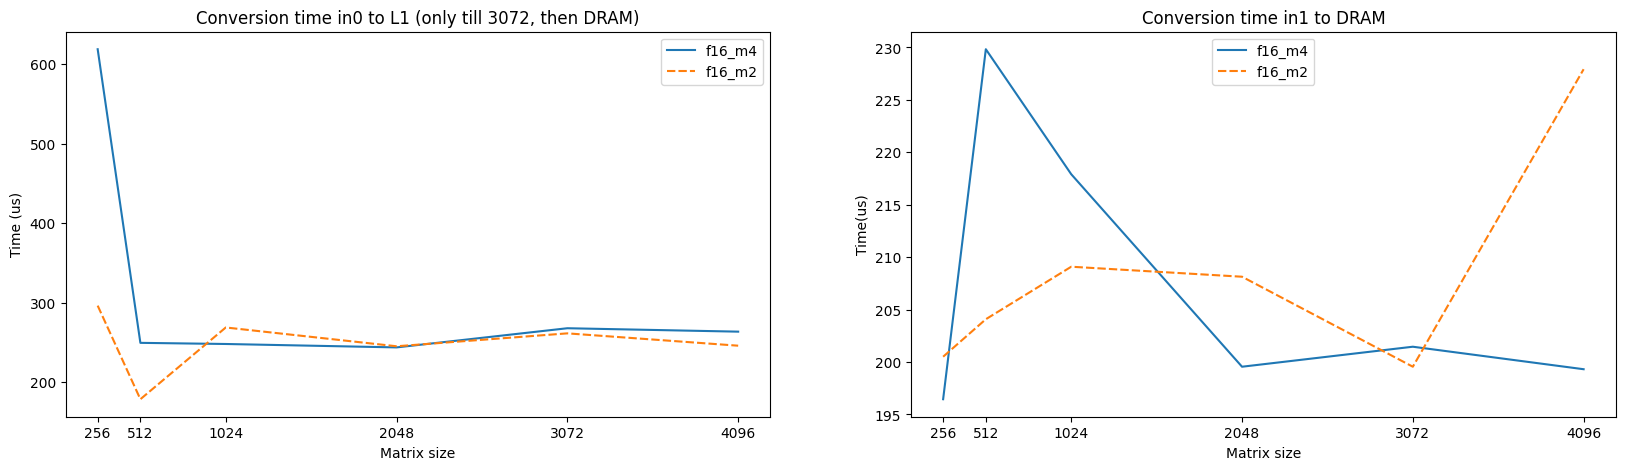

In [6]:
df_conversion0 = get_column_df_info(df, 'conversion_in0', mean=True) 
df_conversion1 = get_column_df_info(df, 'conversion_in1', mean=True)

fig, ax = plt.subplots(1,2, figsize=(20,5))
plot = sns.lineplot(df_conversion0, ax=ax[0])
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Time (us)")
plot.set_title("Conversion time in0 to L1 (only till 3072, then DRAM)")

plot = sns.lineplot(df_conversion1, ax=ax[1])
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Time(us)")
plot.set_title("Conversion time in1 to DRAM")

plt.show()

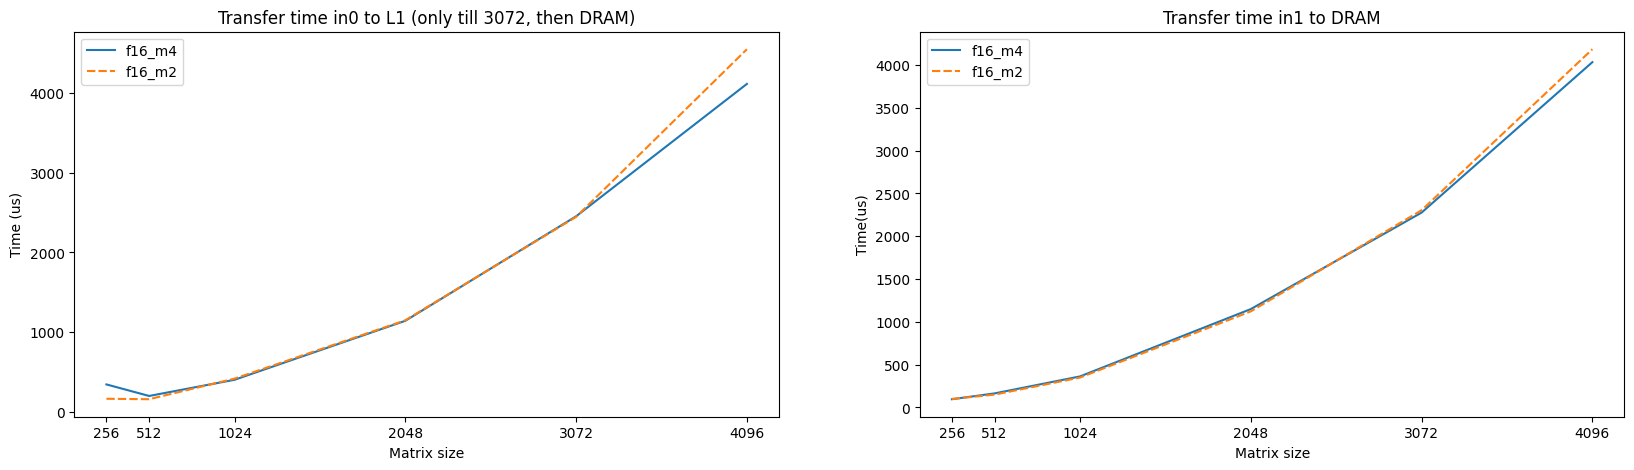

In [7]:
df_transf0 = get_column_df_info(df, 'transfer_in0', mean=True) 
df_transf1 = get_column_df_info(df, 'transfer_in1', mean=True)

fig, ax = plt.subplots(1,2, figsize=(20,5))
plot = sns.lineplot(df_transf0, ax=ax[0])
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Time (us)")
plot.set_title("Transfer time in0 to L1 (only till 3072, then DRAM)")

plot = sns.lineplot(df_transf1, ax=ax[1])
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Time(us)")
plot.set_title("Transfer time in1 to DRAM")

plt.show()


The percentage difference is small, valuable only for 256 matrix

In [8]:
df_transf_comp = (df_transf0 - df_transf1)/df_transf0 * 100
df_transf_comp

,f16_m4,f16_m2
256,72.191401,40.029112
512,17.844311,5.429864
1024,9.964413,16.256440
2048,-0.584429,2.324616
3072,7.228213,5.817579
4096,1.958058,8.010688


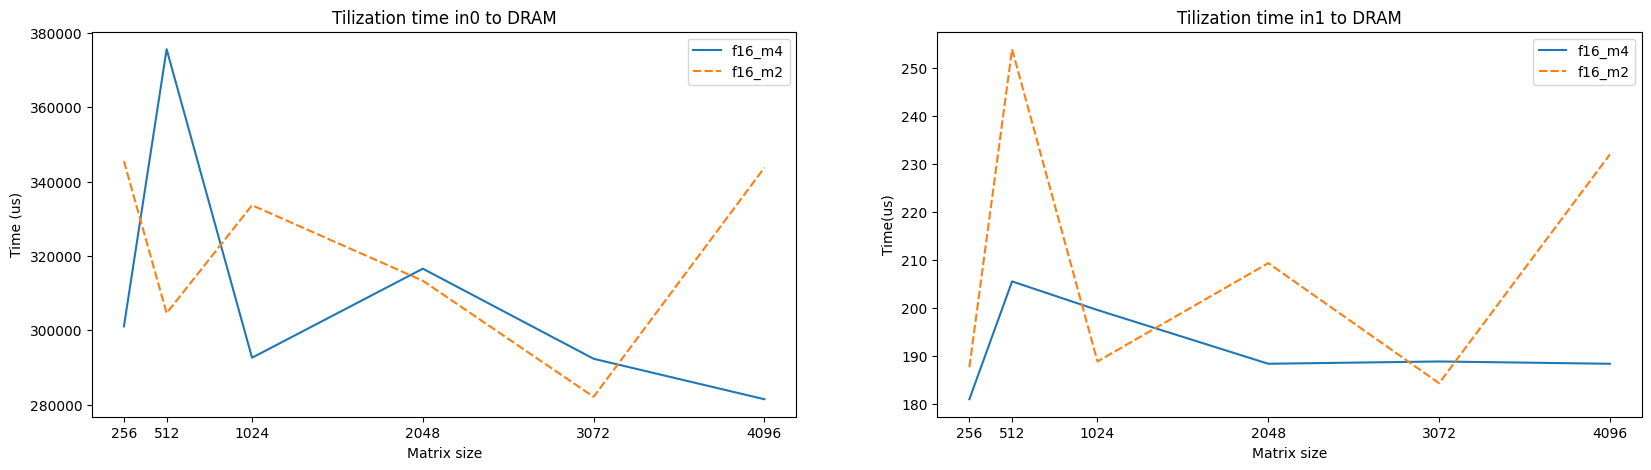

In [9]:
df_tilization0 = get_column_df_info(df, 'tilization_in0', mean=True) 
df_tilization1 = get_column_df_info(df, 'tilization_in1', mean=True)

fig, ax = plt.subplots(1,2, figsize=(20,5))
plot = sns.lineplot(df_tilization0, ax=ax[0])
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Time (us)")
plot.set_title("Tilization time in0 to DRAM")

plot = sns.lineplot(df_tilization1, ax=ax[1])
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Time(us)")
plot.set_title("Tilization time in1 to DRAM")

plt.show()


### Calculate Mb/s transfer

In [10]:
df_transf_norm_b = pd.DataFrame()
elements = df_transf0.index * df_transf0.index
df_transf_norm_b = (16 * elements) / df_transf0['f16_m2']

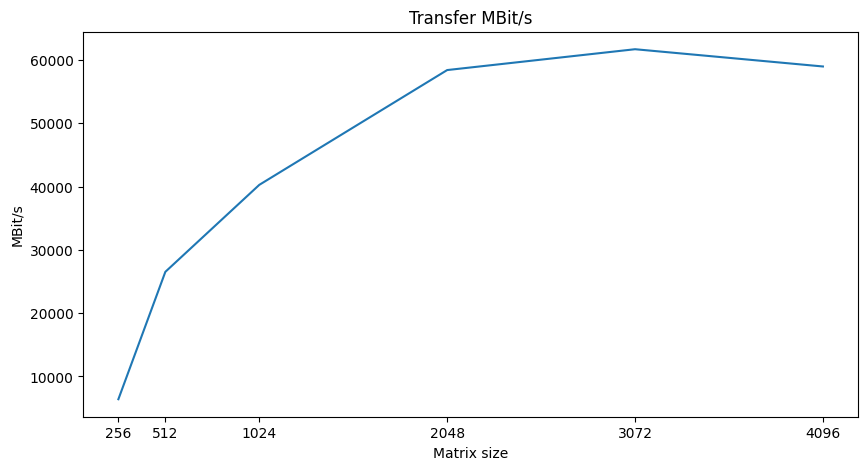

In [11]:
fig, ax = plt.subplots(figsize=(10,5))
plot = sns.lineplot(df_transf_norm_b, ax=ax)
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("MBit/s")
plot.set_title("Transfer MBit/s")

plt.show()

## Compile time

In [12]:
## approx compile_time
df_compile = get_column_df_info(df, 'first_run') - get_column_df_info(df, 'inference_avg')

In [13]:
# df_compile = get_column_df_info(df, 'compile_time')
df_compile

,f16_m4,f16_m2
256,597295.756340,724219.348431
512,746568.989754,598281.683922
1024,607651.896477,666403.045654
2048,626321.322918,725479.340553
3072,678715.496063,609432.692528
4096,601709.141731,688286.602497


To be cleared

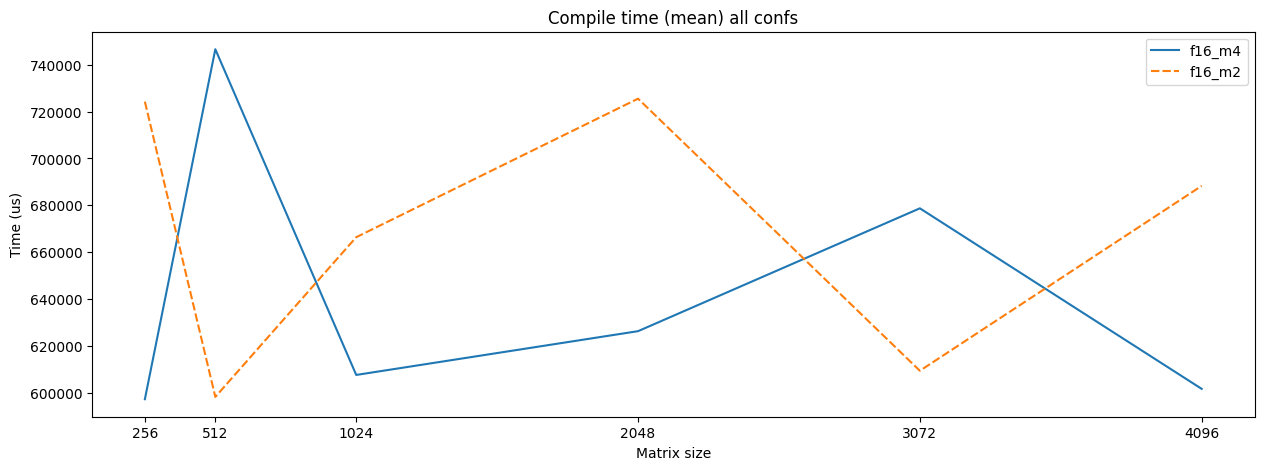

In [14]:
fig, ax = plt.subplots(figsize=(15,5))

plot = sns.lineplot(df_compile, ax=ax)
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Time (us)")
plot.set_title("Compile time (mean) all confs")

plt.show()

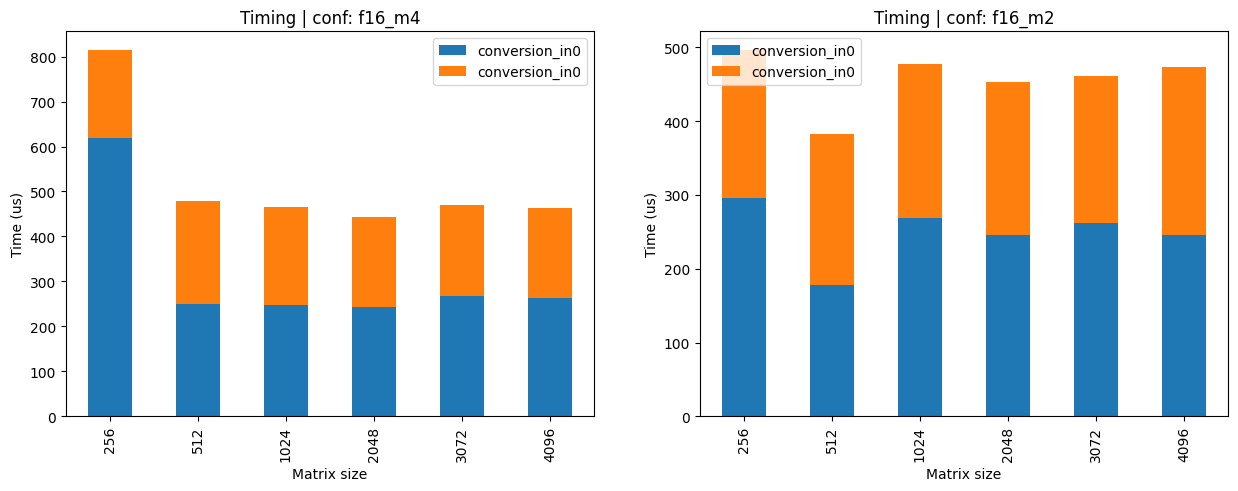

In [17]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
i, j = 0, 0
for conf in df_transf0.columns:
    df_combined = pd.concat([df_conversion0[conf], df_conversion1[conf]], axis=1)
    df_combined.columns = ["conversion_in0", "conversion_in0"]
    df_combined

    # Create a stacked bar plot
    plot = df_combined.plot(kind='bar', stacked=True, ax=axs[j])
    
    if j < 2:
        j+=1
    else:
        j = 0
        i +=1

    plot.set_title(f'Timing | conf: {conf}')
    plot.set_xlabel('Matrix size')
    plot.set_ylabel('Time (us)')
plt.show()

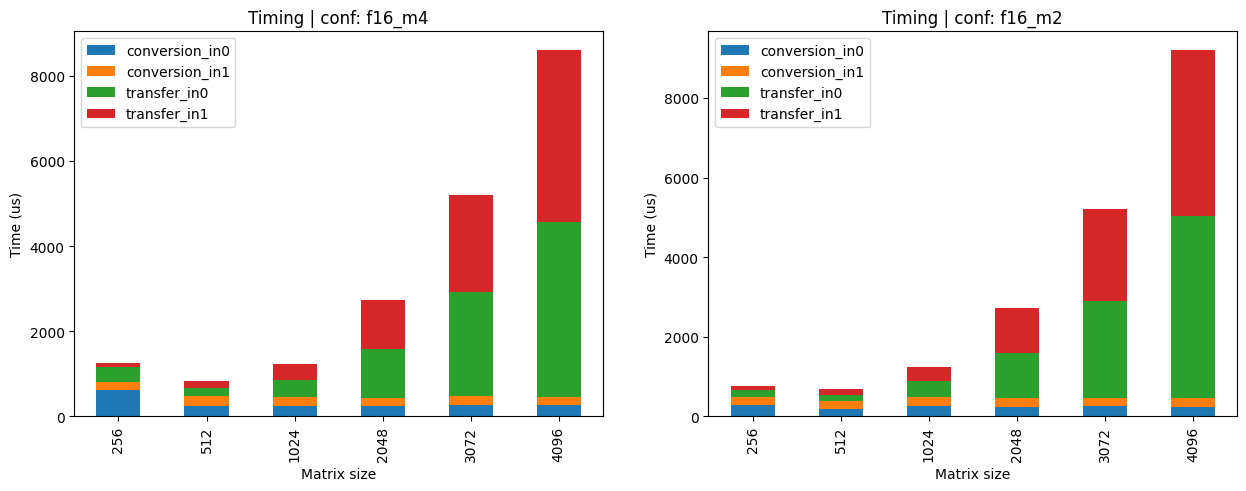

In [57]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
i, j = 0, 0
for conf in df_transf0.columns:
    df_combined = pd.concat([df_conversion0[conf], df_conversion1[conf], df_transf0[conf], df_transf1[conf]], axis=1)
    df_combined.columns = ["conversion_in0", "conversion_in1", "transfer_in0", "transfer_in1"]
    df_combined

    # Create a stacked bar plot
    plot = df_combined.plot(kind='bar', stacked=True, ax=axs[j])
    
    if j < 2:
        j+=1
    else:
        j = 0
        i +=1

    plot.set_title(f'Timing | conf: {conf}')
    plot.set_xlabel('Matrix size')
    plot.set_ylabel('Time (us)')
plt.show()

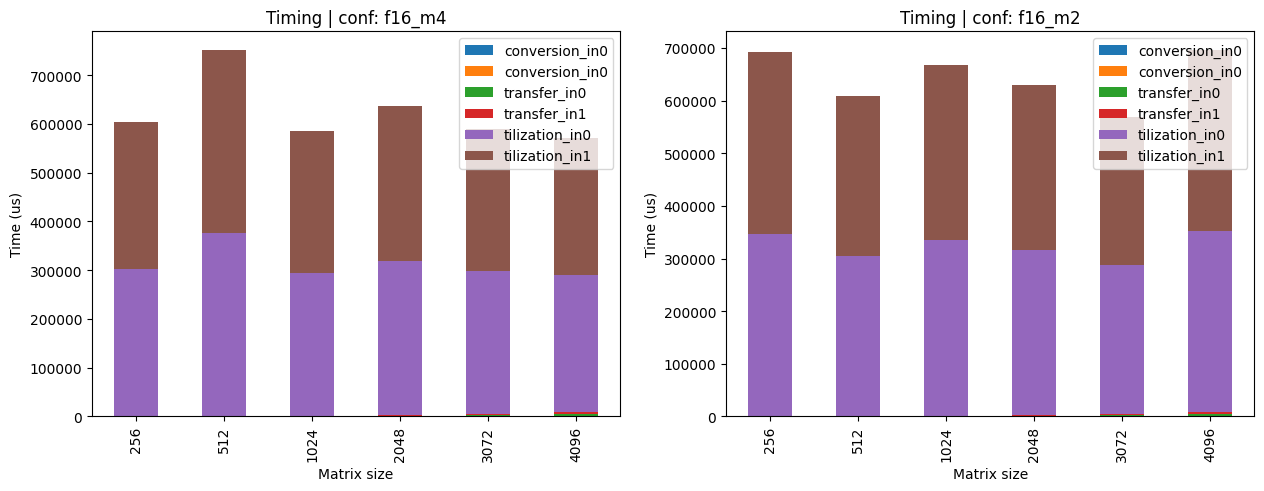

In [15]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
i, j = 0, 0
for conf in df_transf0.columns:
    df_combined = pd.concat([df_conversion0[conf], df_conversion1[conf], df_transf0[conf], df_transf1[conf], df_tilization0[conf], df_tilization0[conf]], axis=1)
    df_combined.columns = ["conversion_in0", "conversion_in0", "transfer_in0", "transfer_in1", "tilization_in0", "tilization_in1"]
    df_combined

    # Create a stacked bar plot
    plot = df_combined.plot(kind='bar', stacked=True, ax=axs[j])
    
    if j < 2:
        j+=1
    else:
        j = 0
        i +=1

    plot.set_title(f'Timing | conf: {conf}')
    plot.set_xlabel('Matrix size')
    plot.set_ylabel('Time (us)')
plt.show()

In [ ]:
df_data_mv = df_conversion0 + df_conversion1 + df_transf0 + df_transf1 + df_tilization0 + df_tilization0


## Inference

In [19]:
# approx second_run
df_sr = get_column_df_info(df, "inference_avg")
# df_sr = get_column_df_info(df, "second_run_time")
df_sr

,f16_m4,f16_m2
256,209.336281,215.981007
512,238.108635,204.262733
1024,222.735405,222.692490
2048,902.645588,899.815559
3072,2237.529755,2232.079506
4096,4608.616829,4580.914974


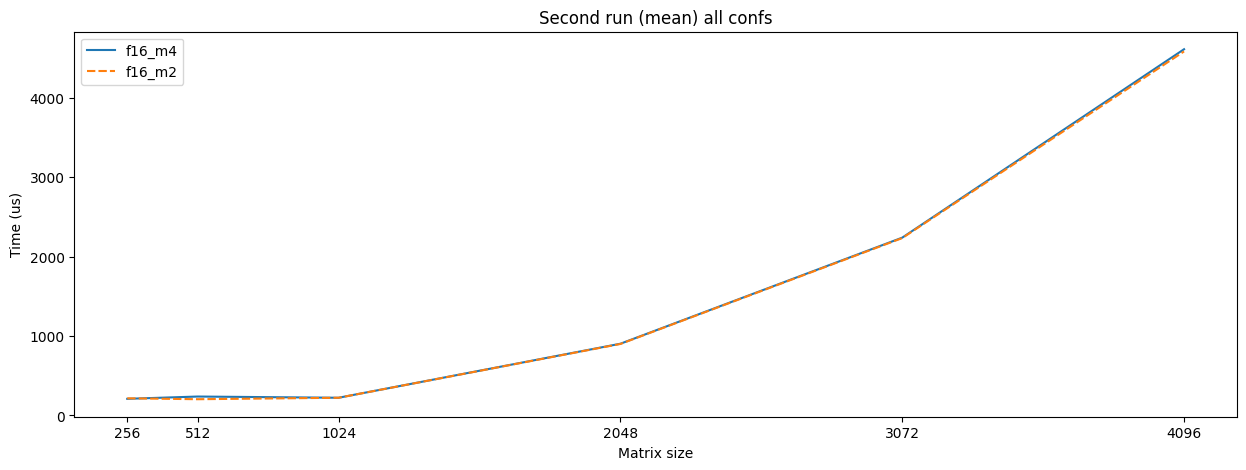

In [20]:
fig, ax = plt.subplots(figsize=(15,5))

plot = sns.lineplot(df_sr, ax=ax)
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Time (us)")
plot.set_title("Second run (mean) all confs")

plt.show()

In [21]:
df_avg = get_column_df_info(df, 'inference_avg')
df_avg

,f16_m4,f16_m2
256,209.336281,215.981007
512,238.108635,204.262733
1024,222.735405,222.692490
2048,902.645588,899.815559
3072,2237.529755,2232.079506
4096,4608.616829,4580.914974


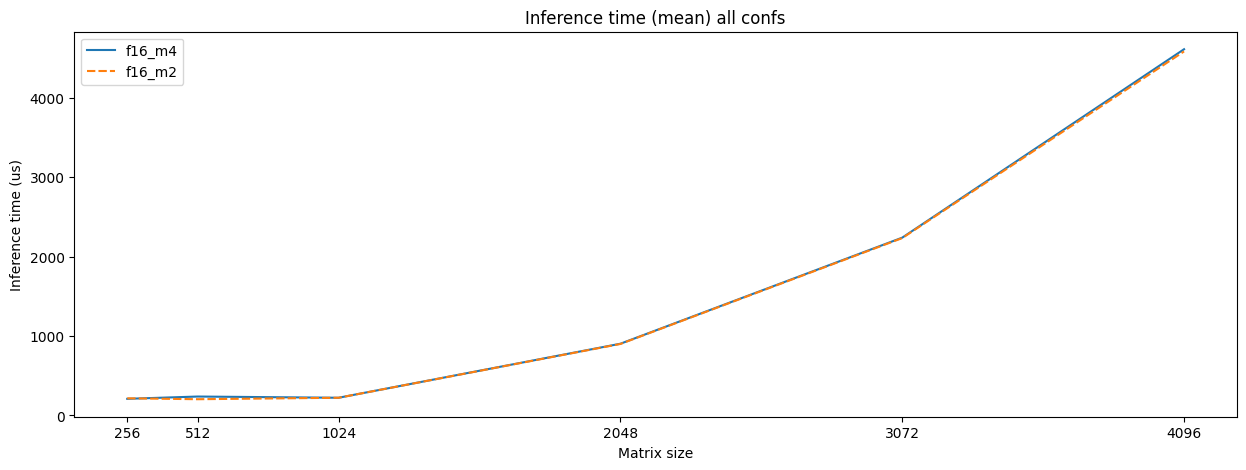

In [22]:
fig, ax = plt.subplots(figsize=(15,5))

plot = sns.lineplot(df_avg, ax=ax)
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Inference time (us)")
plot.set_title("Inference time (mean) all confs")

plt.show()

In [23]:
df_avg_dtype = get_column_df_info(df, 'inference_avg', c_name='dtype', mean=True)
df_avg_dtype

,DataType.BFLOAT16
256,212.658644
512,221.185684
1024,222.713947
2048,901.230574
3072,2234.804630
4096,4594.765902


In [24]:
df_avg_math_fidelity = get_column_df_info(df, 'inference_avg', c_name='math_fidelity', mean=True)
df_avg_math_fidelity

,MathFidelity.HiFi4,MathFidelity.HiFi2
256,209.336281,215.981007
512,238.108635,204.262733
1024,222.735405,222.692490
2048,902.645588,899.815559
3072,2237.529755,2232.079506
4096,4608.616829,4580.914974


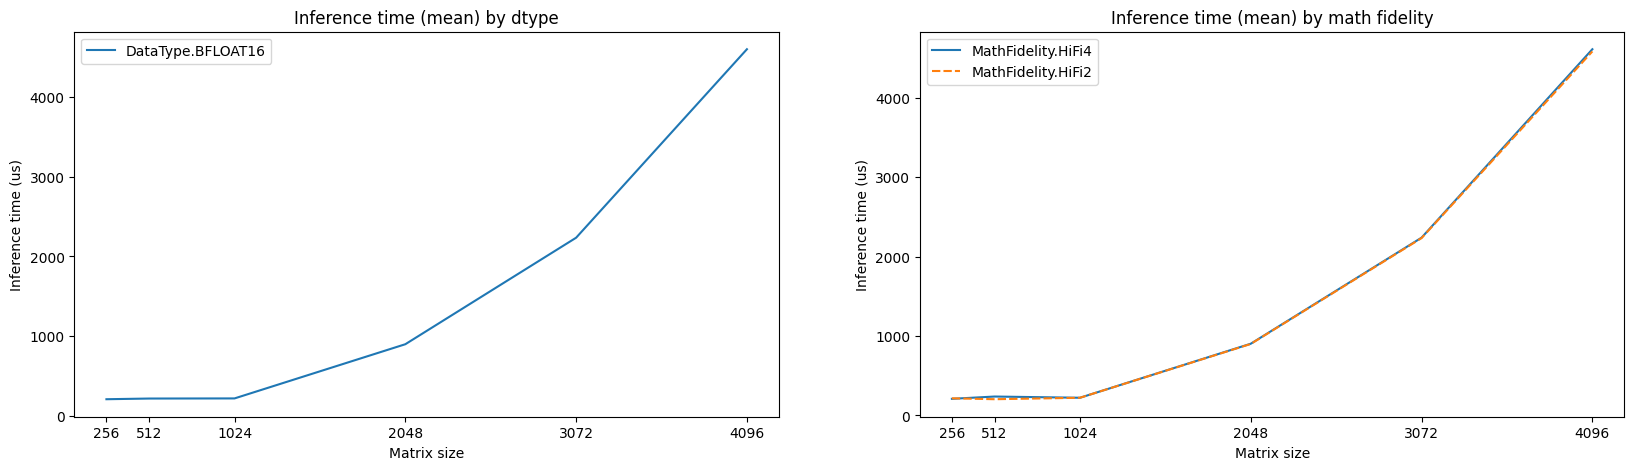

In [25]:
fig, ax = plt.subplots(1,2, figsize=(20,5))

plot = sns.lineplot(df_avg_dtype, ax=ax[0])
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Inference time (us)")
plot.set_title("Inference time (mean) by dtype")

plot = sns.lineplot(df_avg_math_fidelity, ax=ax[1])
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Inference time (us)")
plot.set_title("Inference time (mean) by math fidelity")

plt.show()


In [26]:
(df_sr - df_avg)/df_sr * 100

,f16_m4,f16_m2
256,0.0,0.0
512,0.0,0.0
1024,0.0,0.0
2048,0.0,0.0
3072,0.0,0.0
4096,0.0,0.0


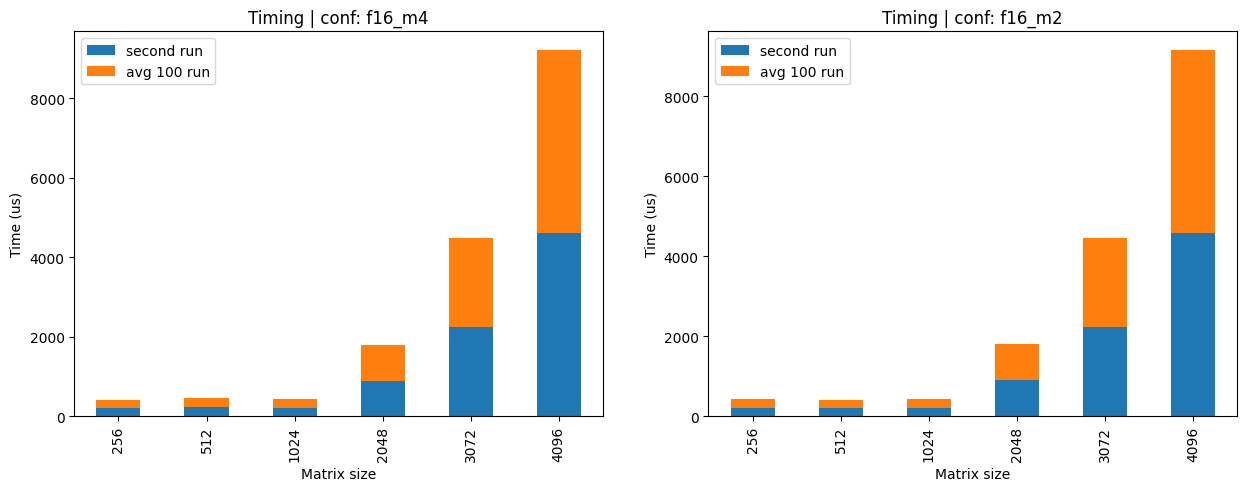

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
i, j = 0, 0
for conf in df_avg.columns:
    df_combined = pd.concat([df_sr[conf], df_avg[conf]], axis=1)
    df_combined.columns = ["second run", "avg 100 run"]
    df_combined

    # Create a stacked bar plot
    plot = df_combined.plot(kind='bar', stacked=True, ax=axs[j])
    
    if j < 2:
        j+=1
    else:
        j = 0
        i +=1

    plot.set_title(f'Timing | conf: {conf}')
    plot.set_xlabel('Matrix size')
    plot.set_ylabel('Time (us)')
plt.show()

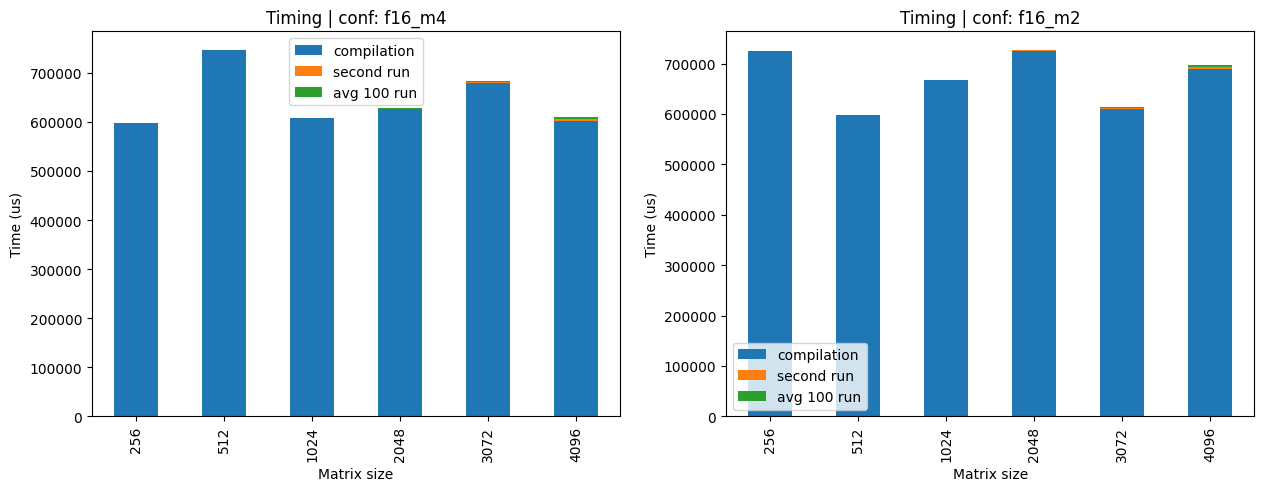

In [28]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
i, j = 0, 0
for conf in df_avg.columns:
    df_combined = pd.concat([df_compile[conf], df_sr[conf], df_avg[conf]], axis=1)
    df_combined.columns = ["compilation", "second run", "avg 100 run"]
    df_combined

    # Create a stacked bar plot
    plot = df_combined.plot(kind='bar', stacked=True, ax=axs[j])
    
    if j < 2:
        j+=1
    else:
        j = 0
        i +=1

    plot.set_title(f'Timing | conf: {conf}')
    plot.set_xlabel('Matrix size')
    plot.set_ylabel('Time (us)')
plt.show()

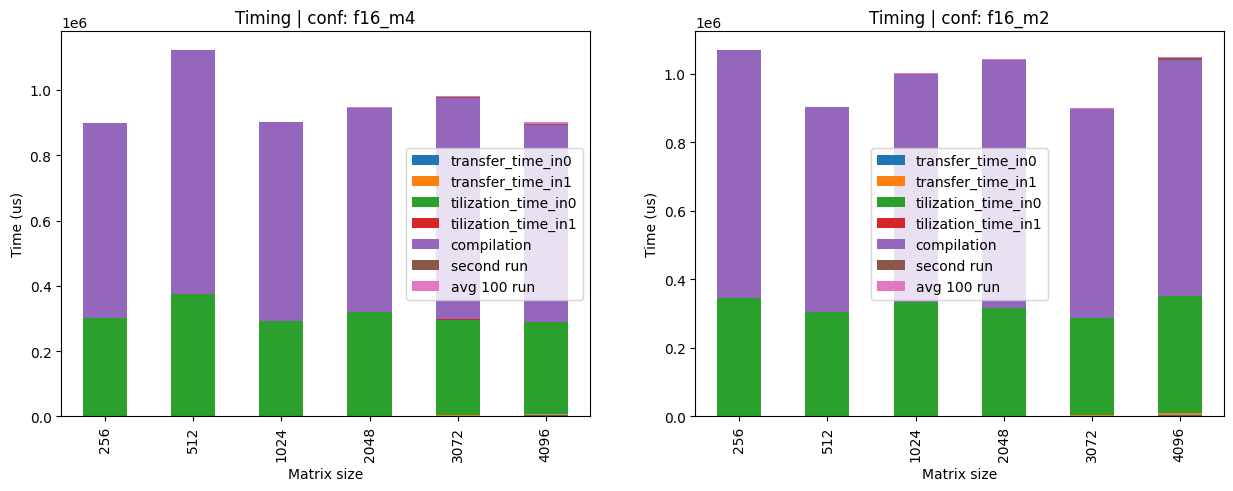

In [41]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
i, j = 0, 0
for conf in df_avg.columns:
    df_combined = pd.concat([df_transf0[conf], df_transf1[conf], df_tilization0[conf], df_tilization1[conf], df_compile[conf], df_sr[conf], df_avg[conf]], axis=1)
    df_combined.columns = ["transfer_time_in0", "transfer_time_in1", "tilization_time_in0", "tilization_time_in1", "compilation", "second run", "avg 100 run"]
    df_combined

    # Create a stacked bar plot
    plot = df_combined.plot(kind='bar', stacked=True, ax=axs[j])
    
    if j < 2:
        j+=1
    else:
        j = 0
        i +=1

    plot.set_title(f'Timing | conf: {conf}')
    plot.set_xlabel('Matrix size')
    plot.set_ylabel('Time (us)')
plt.show()

### Torch comparison 

#### Torch bf16

In [42]:
df_torch = pd.concat([pd.read_csv("./results/torch_bfp16.csv", index_col="m"), pd.read_csv("./results/torch_fp32.csv", index_col="m")], axis=1)
df_compare_conf_torch = pd.concat([df_avg, df_torch], axis=1)
df_compare_conf_torch

,f16_m4,f16_m2,torch_bfp16,torch_fp32
256,209.336281,215.981007,8.491991e+03,8.206129e+01
512,238.108635,204.262733,1.669232e+05,4.992867e+02
1024,222.735405,222.692490,1.433732e+06,3.081963e+03
2048,902.645588,899.815559,2.732600e+07,2.506427e+04
3072,2237.529755,2232.079506,9.042670e+07,8.344136e+04
4096,4608.616829,4580.914974,3.248094e+08,2.274305e+05
8192,NaN,NaN,3.198951e+09,1.653865e+06


CPU Torch fp16 is out of scale (working single core)

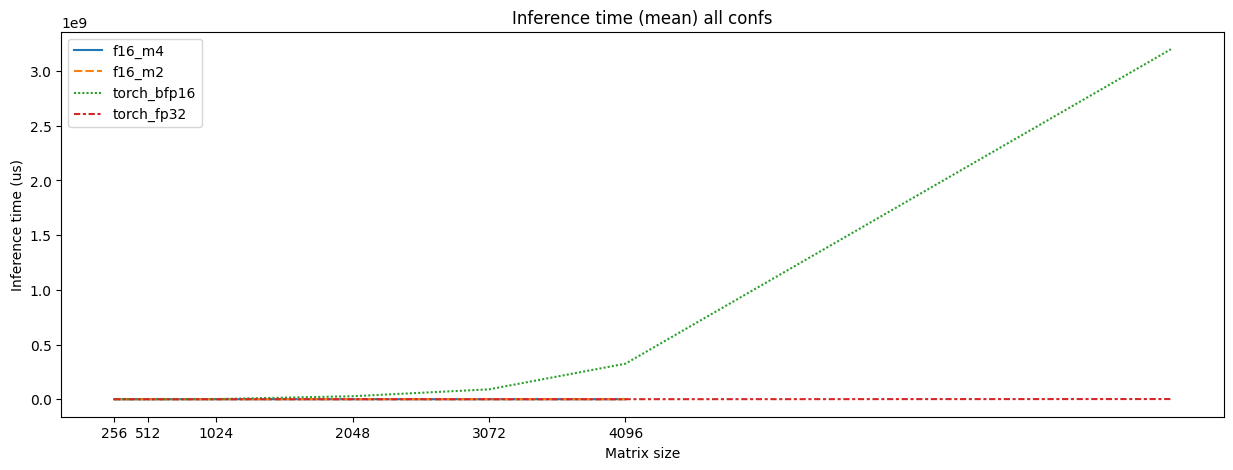

In [43]:
fig, ax = plt.subplots(figsize=(15,5))

plot = sns.lineplot(df_compare_conf_torch, ax=ax)
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Inference time (us)")
plot.set_title("Inference time (mean) all confs")

plt.show()

Smaller window and ignore fp16

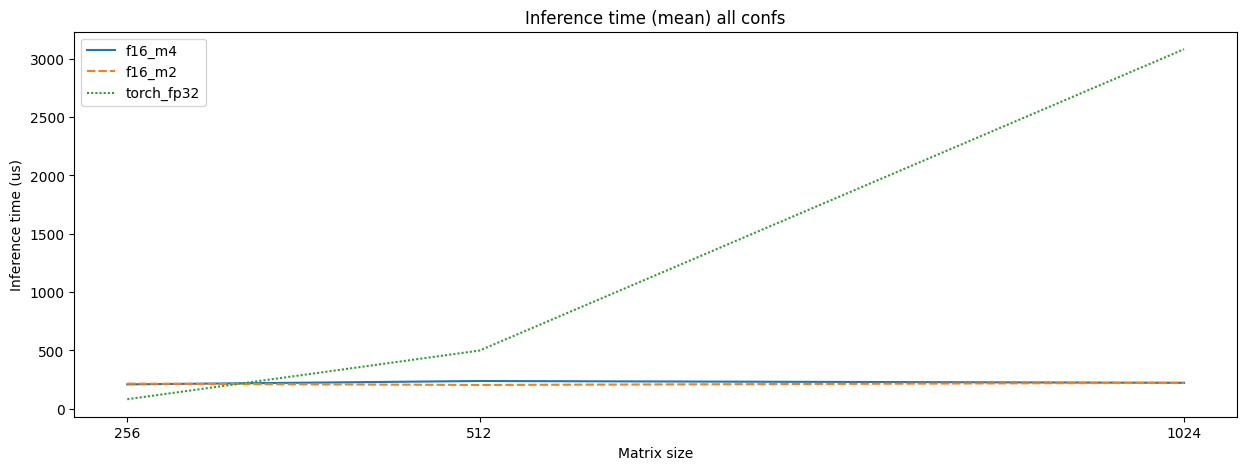

In [44]:
fig, ax = plt.subplots(figsize=(15,5))
window = 3

plot = sns.lineplot(df_compare_conf_torch.drop("torch_bfp16", axis=1).iloc[:window], ax=ax)
plot.set_xticks(unq_m[:window])
plot.set_xlabel("Matrix size")
plot.set_ylabel("Inference time (us)")
plot.set_title("Inference time (mean) all confs")

plt.show()

##### Torch comparison including transfer time

In [45]:
df_compare_conf_torch_tot = pd.concat([df_transf0 + df_transf1 + df_compile + df_avg, df_torch], axis=1)
df_compare_conf_torch_tot

,f16_m4,f16_m2,torch_bfp16,torch_fp32
256,597944.498062,724697.351456,8.491991e+03,8.206129e+01
512,747169.733047,598793.506622,1.669232e+05,4.992867e+02
1024,608638.525009,667391.061783,1.433732e+06,3.081963e+03
2048,629515.171051,728649.854660,2.732600e+07,2.506427e+04
3072,685683.727264,616415.739059,9.042670e+07,8.344136e+04
4096,614468.336105,701604.366302,3.248094e+08,2.274305e+05
8192,NaN,NaN,3.198951e+09,1.653865e+06


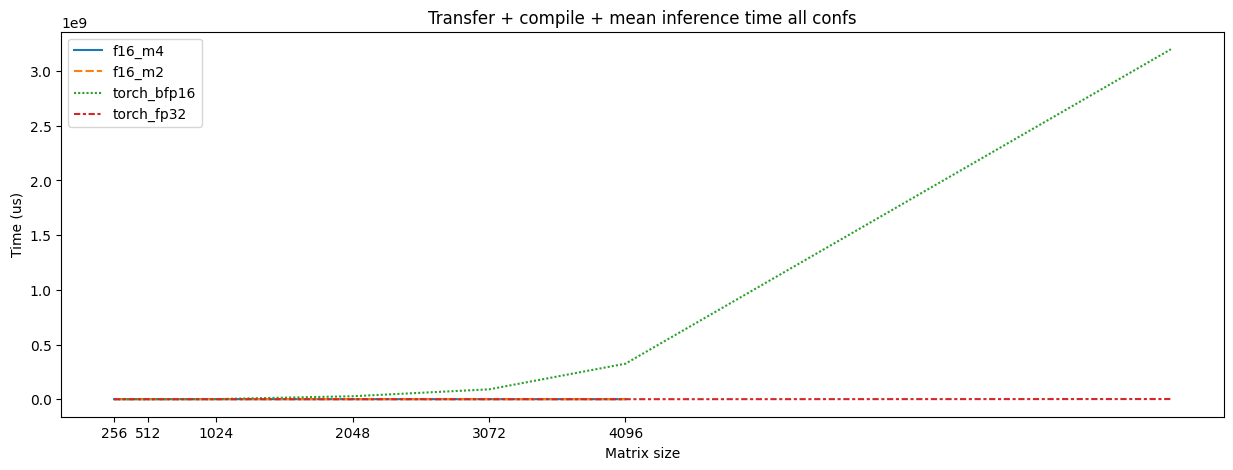

In [46]:
fig, ax = plt.subplots(figsize=(15,5))

plot = sns.lineplot(df_compare_conf_torch_tot, ax=ax)
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Time (us)")
plot.set_title("Transfer + compile + mean inference time all confs")

plt.show()

Smaller window. A single matmul is always faster on CPU (torch_32) due to the overhead

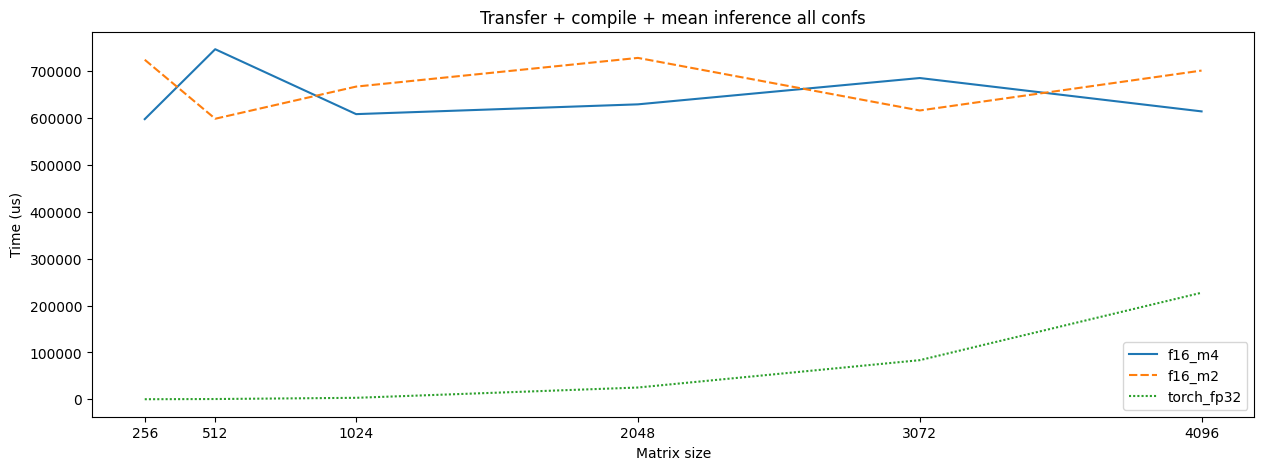

In [56]:
fig, ax = plt.subplots(figsize=(15,5))

window = 6
plot = sns.lineplot(df_compare_conf_torch_tot.drop("torch_bfp16", axis=1).iloc[:window], ax=ax)
plot.set_xticks(unq_m[:window])
plot.set_xlabel("Matrix size")
plot.set_ylabel("Time (us)")
plot.set_title("Transfer + compile + mean inference all confs")

plt.show()

## Acceleration vs CPU

$$
CPU_t = \mathcal{N} \text{matmul}_{CPU}\\
TT_t = \text{transfer}_t + \text{compilation}_t + \mathcal{N} \text{matmul}_{TT} \\
$$

To obtain $TT_t < CPU_t$, we need to size N: 

$
    \text{transfer}_t + \text{compilation}_t < \mathcal{N}(\text{matmul}_{CPU} - \text{matmul}_{TT})\\
$

$$
    \mathcal{N} > \frac{\text{transfer}_t + \text{compilation}_t}{\text{matmul}_{CPU} - \text{matmul}_{TT}}
$$

In [48]:
df_overhead = (df_transf0 + df_transf1 + df_compile)
df_overhead

,f16_m4,f16_m2
256,597735.161781,724481.370449
512,746931.624413,598589.243889
1024,608415.789604,667168.369293
2048,628612.525463,727750.039101
3072,683446.197510,614183.659554
4096,609859.719276,697023.451328


In [49]:
df_accl = ((- df_avg).add(df_torch['torch_fp32'], axis=0))
df_accl

,f16_m4,f16_m2
256,-127.274990,-133.919716
512,261.178017,295.023918
1024,2859.227657,2859.270573
2048,24161.622524,24164.452553
3072,81203.827858,81209.278107
4096,222821.884155,222849.586010
8192,NaN,NaN


In [50]:
df_N_accl = df_overhead / df_accl
df_N_accl

,f16_m4,f16_m2
256,-4696.407058,-5409.818604
512,2859.856407,2028.951577
1024,212.790258,233.335164
2048,26.016983,30.116554
3072,8.416428,7.562974
4096,2.736983,3.127775
8192,NaN,NaN


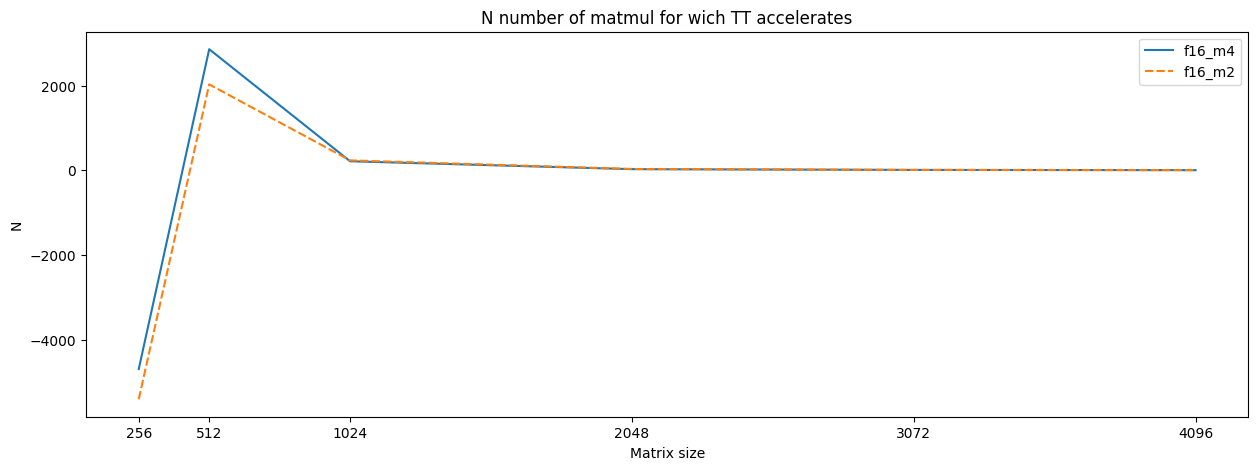

In [51]:
fig, ax = plt.subplots(figsize=(15,5))

plot = sns.lineplot(df_N_accl, ax=ax)
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("N")
plot.set_title("N number of matmul for wich TT accelerates")

plt.show()